# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_key ="ba01d29f51e9ee2039e1fbd74ceae254"
api_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_data =[]
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
for i, city in enumerate (cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    city_url = api_url + "&q=" + city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    try:
        # Parse the JSON and retrieve data
       city_weather = requests.get(city_url).json()
       # Parse out the max temp, humidity, and cloudiness
       city_lat = city_weather["coord"]["lat"]
       city_lng = city_weather["coord"]["lon"]
       city_max_temp = city_weather["main"]["temp_max"]
       city_humidity = city_weather["main"]["humidity"]
       city_clouds = city_weather["clouds"]["all"]
       city_wind = city_weather["wind"]["speed"]
       city_country = city_weather["sys"]["country"]
       city_date = city_weather["dt"]
       city_data.append({"City": city,
                     "Lat": city_lat,
                     "Lng": city_lng,
                     "Max Temp": city_max_temp,
                     "Humidity": city_humidity,
                     "Cloudiness": city_clouds,
                     "Wind Speed": city_wind,
                     "Country": city_country,
                     "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 6 of Set 1 | dingle
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | nouakchott
Processing Record 10 of Set 1 | richards bay
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | kaitangata
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | souillac
Processing Record 18 of Set 1 | chipinge
Processing Record 19 of Set 1 | gela
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | louisbou

Processing Record 31 of Set 4 | bonthe
Processing Record 32 of Set 4 | mitu
Processing Record 33 of Set 4 | masuguru
Processing Record 34 of Set 4 | jimo
Processing Record 35 of Set 4 | bayangol
Processing Record 36 of Set 4 | vila
Processing Record 37 of Set 4 | marystown
Processing Record 38 of Set 4 | mogok
Processing Record 39 of Set 4 | lebu
Processing Record 40 of Set 4 | clyde river
Processing Record 41 of Set 4 | mercedes
Processing Record 42 of Set 4 | itapirapua
Processing Record 43 of Set 4 | kupang
Processing Record 44 of Set 4 | moyale
Processing Record 45 of Set 4 | gurskoye
City not found. Skipping...
Processing Record 46 of Set 4 | hay river
Processing Record 47 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 48 of Set 4 | kodiak
Processing Record 49 of Set 4 | muroto
Processing Record 0 of Set 5 | laredo
Processing Record 1 of Set 5 | kruisfontein
Processing Record 2 of Set 5 | akdepe
Processing Record 3 of Set 5 | usinsk
Processing Record 4 of Set 

Processing Record 19 of Set 8 | raudeberg
Processing Record 20 of Set 8 | lima
Processing Record 21 of Set 8 | karratha
Processing Record 22 of Set 8 | touros
Processing Record 23 of Set 8 | gonzalez
Processing Record 24 of Set 8 | boquete
Processing Record 25 of Set 8 | sorland
Processing Record 26 of Set 8 | shalya
Processing Record 27 of Set 8 | burnie
Processing Record 28 of Set 8 | ostrovnoy
Processing Record 29 of Set 8 | bonavista
Processing Record 30 of Set 8 | kikwit
Processing Record 31 of Set 8 | port hedland
Processing Record 32 of Set 8 | yarim
Processing Record 33 of Set 8 | santa lucia
Processing Record 34 of Set 8 | yarega
Processing Record 35 of Set 8 | miranda
Processing Record 36 of Set 8 | port keats
Processing Record 37 of Set 8 | faya
Processing Record 38 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 39 of Set 8 | amalapuram
Processing Record 40 of Set 8 | fortuna
Processing Record 41 of Set 8 | warrnambool
Processing Record 42 of Set 8 | tuatapere
Proces

Processing Record 10 of Set 12 | jalu
Processing Record 11 of Set 12 | sinnamary
Processing Record 12 of Set 12 | sungaipenuh
Processing Record 13 of Set 12 | zhanakorgan
Processing Record 14 of Set 12 | yingkou
Processing Record 15 of Set 12 | oktyabrskiy
Processing Record 16 of Set 12 | sorvag
City not found. Skipping...
Processing Record 17 of Set 12 | carutapera
Processing Record 18 of Set 12 | cheremshan
Processing Record 19 of Set 12 | beringovskiy
Processing Record 20 of Set 12 | aguimes
Processing Record 21 of Set 12 | constantine
Processing Record 22 of Set 12 | namibe
Processing Record 23 of Set 12 | hit
Processing Record 24 of Set 12 | port hardy
Processing Record 25 of Set 12 | preston
Processing Record 26 of Set 12 | aksarka
Processing Record 27 of Set 12 | luganville
Processing Record 28 of Set 12 | beliu
Processing Record 29 of Set 12 | wanaka
Processing Record 30 of Set 12 | ampanihy
Processing Record 31 of Set 12 | westport
Processing Record 32 of Set 12 | russell
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
api_key ="ba01d29f51e9ee2039e1fbd74ceae254"
api_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
counter = 0
record_counter = 0
setcount = 1

for city in cities:

    city_url = api_url + "&q=" + city
    counter += 1
    if (counter % 50 == 0):
        setcount += 1
        record_counter = 0
        print("---------------------------------------")
        print("We've made it to set " + str(setcount) + ".")
        print("We'll reset the record counter to " + str(record_counter) + ".")
        print("So far, we have " + str(counter) + " total records.")
        print("---------------------------------------")
    record_counter += 1
    print("processing Record " + str(record_counter) + " of Set " + str(setcount) + " | " + city)
    try:
        weather_response = requests.get(city_url).json()
        #pprint(weather_response)
        city_list.append(weather_response['name'])
        lat_list.append(weather_response['coord']['lat'])
        lng_list.append(weather_response['coord']['lon'])
        max_temp_list.append(weather_response['main']['temp_max'])
        humidity_list.append(weather_response['main']['humidity'])
        cloudiness_list.append(weather_response['clouds']['all'])
        windspeed_list.append(weather_response['wind']['speed'])
    except:
        print("City not found: " + city)
print(len(weather_response))

processing Record 1 of Set 1 | new norfolk
processing Record 2 of Set 1 | ushuaia
processing Record 3 of Set 1 | yellowknife
processing Record 4 of Set 1 | bengkulu
City not found: bengkulu
processing Record 5 of Set 1 | umzimvubu
City not found: umzimvubu
processing Record 6 of Set 1 | dingle
processing Record 7 of Set 1 | puerto ayora
processing Record 8 of Set 1 | atuona
processing Record 9 of Set 1 | nouakchott
processing Record 10 of Set 1 | richards bay
processing Record 11 of Set 1 | bethel
processing Record 12 of Set 1 | albany
processing Record 13 of Set 1 | avarua
processing Record 14 of Set 1 | kaitangata
processing Record 15 of Set 1 | taolanaro
City not found: taolanaro
processing Record 16 of Set 1 | castro
processing Record 17 of Set 1 | souillac
processing Record 18 of Set 1 | chipinge
processing Record 19 of Set 1 | gela
processing Record 20 of Set 1 | butaritari
processing Record 21 of Set 1 | louisbourg
City not found: louisbourg
processing Record 22 of Set 1 | porto

processing Record 23 of Set 4 | nikolskoye
processing Record 24 of Set 4 | ola
processing Record 25 of Set 4 | ponta do sol
processing Record 26 of Set 4 | pekan
processing Record 27 of Set 4 | georgetown
processing Record 28 of Set 4 | pacific grove
processing Record 29 of Set 4 | macau
processing Record 30 of Set 4 | kavaratti
processing Record 31 of Set 4 | afgoye
City not found: afgoye
processing Record 32 of Set 4 | avera
processing Record 33 of Set 4 | bonthe
processing Record 34 of Set 4 | mitu
processing Record 35 of Set 4 | masuguru
processing Record 36 of Set 4 | jimo
processing Record 37 of Set 4 | bayangol
processing Record 38 of Set 4 | vila
processing Record 39 of Set 4 | marystown
processing Record 40 of Set 4 | mogok
processing Record 41 of Set 4 | lebu
processing Record 42 of Set 4 | clyde river
processing Record 43 of Set 4 | mercedes
processing Record 44 of Set 4 | itapirapua
processing Record 45 of Set 4 | kupang
processing Record 46 of Set 4 | moyale
processing Rec

City not found: chagda
processing Record 2 of Set 8 | winona
processing Record 3 of Set 8 | port blair
processing Record 4 of Set 8 | sentyabrskiy
City not found: sentyabrskiy
processing Record 5 of Set 8 | zapolyarnyy
processing Record 6 of Set 8 | fleetwood
processing Record 7 of Set 8 | umm ruwabah
City not found: umm ruwabah
processing Record 8 of Set 8 | sisimiut
processing Record 9 of Set 8 | columbia
processing Record 10 of Set 8 | la rioja
processing Record 11 of Set 8 | quartz hill
processing Record 12 of Set 8 | grindavik
processing Record 13 of Set 8 | kahului
processing Record 14 of Set 8 | torquay
processing Record 15 of Set 8 | punto fijo
processing Record 16 of Set 8 | pochutla
processing Record 17 of Set 8 | pozo colorado
processing Record 18 of Set 8 | geresk
City not found: geresk
processing Record 19 of Set 8 | japura
processing Record 20 of Set 8 | harper
processing Record 21 of Set 8 | raudeberg
processing Record 22 of Set 8 | lima
processing Record 23 of Set 8 | k

City not found: sembe
processing Record 31 of Set 11 | keflavik
processing Record 32 of Set 11 | nalut
processing Record 33 of Set 11 | nuuk
processing Record 34 of Set 11 | okhotsk
processing Record 35 of Set 11 | bereda
processing Record 36 of Set 11 | dudinka
processing Record 37 of Set 11 | ardalstangen
processing Record 38 of Set 11 | kantang
processing Record 39 of Set 11 | paamiut
processing Record 40 of Set 11 | nara
processing Record 41 of Set 11 | bamiantong
processing Record 42 of Set 11 | upington
processing Record 43 of Set 11 | bulawayo
processing Record 44 of Set 11 | tabou
processing Record 45 of Set 11 | ambon
processing Record 46 of Set 11 | kaimur
City not found: kaimur
processing Record 47 of Set 11 | abu dhabi
processing Record 48 of Set 11 | sorokino
processing Record 49 of Set 11 | halifax
processing Record 50 of Set 11 | camapua
---------------------------------------
We've made it to set 12.
We'll reset the record counter to 0.
So far, we have 550 total records

In [5]:
#Length of list
print(len(city_list))
print(len(lat_list))
print(len(lng_list))
print(len(max_temp_list))
print(len(humidity_list))
print(len(cloudiness_list))
print(len(windspeed_list))

540
540
540
540
540
540
540


In [6]:
weather_dict={"city":city_list,
                "lat":lat_list,
                "lng":lng_list,
                "max_temp":max_temp_list,
                "humidity":humidity_list,
                "cloudiness":cloudiness_list,
                "windspeed":windspeed_list}
weather_df=pd.DataFrame(weather_dict)
weather_df.head()

,city,lat,lng,max_temp,humidity,cloudiness,windspeed
0,New Norfolk,-42.78,147.06,66.00,72,75,8.05
1,Ushuaia,-54.81,-68.31,55.40,54,75,6.93
2,Yellowknife,62.45,-114.38,-20.00,75,75,5.82
3,Dingle,11.00,122.67,76.15,90,46,9.82
4,Puerto Ayora,-0.74,-90.35,84.20,58,75,18.34


In [7]:
weather_df.to_csv("cities.csv",index=False)

In [8]:
weather_df["lat"]

0     -42.78
1     -54.81
2      62.45
3      11.00
4      -0.74
       ...  
535    40.80
536     0.56
537    64.92
538    67.44
539    29.70
Name: lat, Length: 540, dtype: float64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

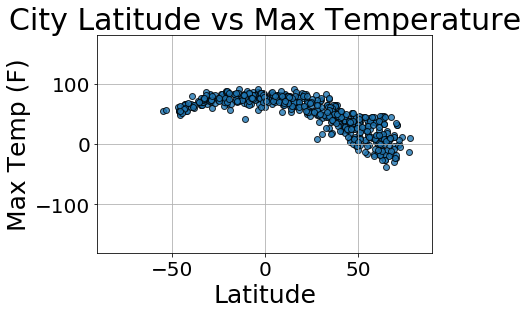

In [9]:
plt.scatter(weather_df['lat'], weather_df['max_temp'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title('City Latitude vs Max Temperature', fontsize =30)
plt.ylabel('Max Temp (F)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(-180, 180)
plt.tick_params(labelsize=20)
#plt.show()
plt.savefig('latitute_Temperature.png')

#### Latitude vs. Humidity Plot

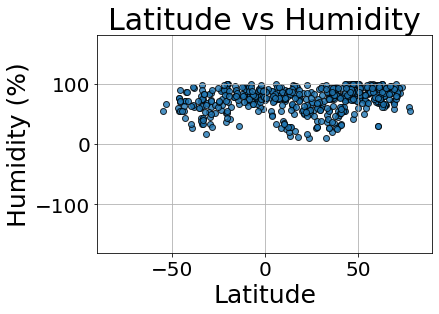

In [10]:
plt.scatter(weather_df['lat'], weather_df['humidity'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title('Latitude vs Humidity', fontsize =30)
plt.ylabel('Humidity (%)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(-180, 180)
plt.tick_params(labelsize=20)
#plt.show()
plt.savefig('latitute_humidity.png')

#### Latitude vs. Cloudiness Plot

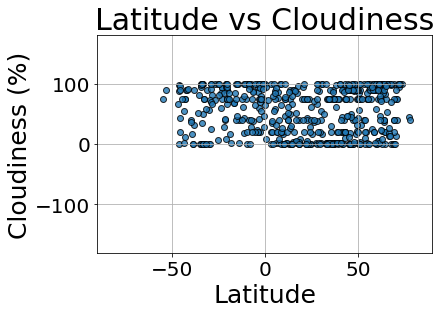

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(weather_df['lat'], weather_df['cloudiness'], edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")
plt.title('Latitude vs Cloudiness', fontsize =30)
plt.ylabel('Cloudiness (%)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(-180, 180)
plt.tick_params(labelsize=20)
plt.show()
plt.savefig('latitute_cloudiness.png')

#### Latitude vs. Wind Speed Plot

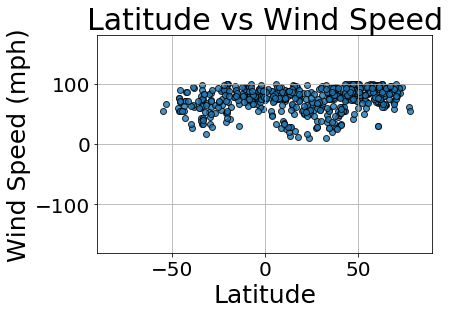

In [12]:
plt.scatter(weather_df['lat'], weather_df['humidity'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title('Latitude vs Wind Speed Plot', fontsize =30)
plt.title('Latitude vs Wind Speed', fontsize =30)
plt.ylabel('Wind Speed (mph)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(-180, 180)
plt.tick_params(labelsize=20)
#plt.show()
plt.savefig('latitute_windspeed.png')

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots


In [14]:
# Create Northern and Southern Hemisphere DataFrames


KeyError: 'Lat'

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression